We learned how to use NumPy and vectorized operations to analyze taxi trip data from the city of New York. We learned that NumPy makes it quick and easy to select data, and includes a number of functions and methods that make it easy to calculate statistics across the different axes (or dimensions).

However, what if we also wanted to find out how many trips were taken in each month? Or which airport is the busiest? For this, we will learn a new technique: **Boolean Indexing**.

Now that we understand NumPy a little better, let's learn how to use the `numpy.genfromtxt()` function to read files into NumPy ndarrays. Here is the simplified syntax for the function, and an explanation of the two parameters:

`np.genfromtxt(filename, delimiter=None)`

* `filename`: A positional argument, usually a string representing the path to the text file to be read.
* `delimiter`: A named argument, specifying the string used to separate each value.

In this case, because we have a CSV file, the delimiter is a comma. Here's how we'd read in a file named data.csv:

In [2]:
import numpy as np

taxi = np.genfromtxt("nyc_taxis.csv", delimiter = ",")

In [2]:
taxi_shape = taxi.shape
taxi_shape

(89561, 15)

We may not have noticed in the file that we converted all the values to floats before we converted the list of lists to a ndarray. That's because NumPy ndarrays can contain only one data type

We didn't have to complete this step in the last execise, because when `numpy.genfromtxt()` reads in a file, it attempts to determine the data type of the file by looking at the values.

In [3]:
print(taxi.dtype)

float64


NumPy chose the `float64` type, since it will allow most of the values from our CSV to be read. We can think of NumPy's float64 type as being identical to Python's float type (the "64" refers to the number of bits used to store the underlying value).

If we review the results, we can see that `taxi` contains almost all numbers except for a value that we haven't seen before: `nan`.

`NaN` is an acronym for **Not a Number** - it literally means that the value cannot be stored as a number. It is similar to (and often referred to as a) **null** value, like Python's **None** constant.

`NaN` is most commonly seen when a value is missing, but in this case, we have NaN values because the first line from our CSV file contains the names of each column. NumPy is unable to convert string values like `pickup_year` into the float64 data type.

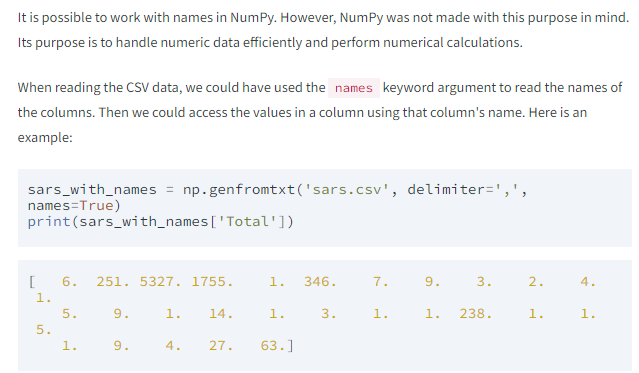

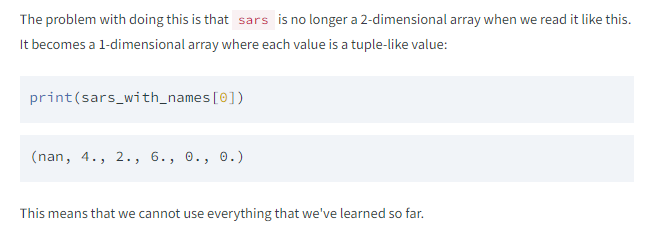

So, we'll not use the names and work with the purely numeric data. This means that we'll need to use indexes of the columns rather than column names.

For now, we need to remove this header row from our ndarray. We can do this the same way we would if our data was stored in a list of lists:

`taxi = taxi[1:]`


Alternatively, we can pass an additional parameter, `skip_header`, to the `numpy.genfromtxt()` function. The `skip_header` parameter accepts an integer, the number of rows from the start of the file to skip. Note that because this integer should be the number of rows and not the index, skipping the first row would require a value of 1, not 0

In [4]:
taxi = np.genfromtxt('nyc_taxis.csv', delimiter=',', skip_header=1) # we can also use skip_header = True
taxi_shape = taxi.shape

We're going to focus on arguably the most powerful method, the boolean array. A boolean array, as the name suggests, is an array of boolean values. Boolean arrays are sometimes called `boolean vectors` or `boolean masks`.

We learned that an operation between a ndarray and a single value results in a new ndarray:

`print(np.array([2,4,6,8]) + 10)`

`[12 14 16 18]`

The `+ 10` operation is applied to each value in the array.

Now, let's look at what happens when we perform a boolean operation between an ndarray and a single value:

`print(np.array([2,4,6,8]) < 5)
[ True  True False False]`

A similar pattern occurs – each value in the array is compared to five. If the value is less than five, `True` is returned. Otherwise, `False` is returned.



In [5]:
a = np.array([1, 2, 3, 4, 5])
b = np.array(["blue", "blue", "red", "blue"])
c = np.array([80.0, 103.4, 96.9, 200.3])

a_bool = a < 3
b_bool = b == "blue"
c_bool = c > 100
c_bool

array([False,  True, False,  True])

Next, we'll learn how to index (or select) using boolean arrays, known as `boolean indexing`

To index using our boolean array, we simply insert it in the square brackets, just like we would do with our other selection techniques:

The boolean array acts as a filter, so that the values corresponding to `True` become part of the result and the values corresponding to `False` are removed.

In [6]:
# Calculate the number of rides in the taxi that are from February:
february_rides = taxi[taxi[:,1] == 2]
february_rides.shape[0]

13333

Note: Boolean array must have the same length as the dimension we're indexing. 

In [7]:
# Determines which rows have values for the tip_amount column of more than 50.
tip_bool = taxi[:,12] > 50
print(tip_bool)

[False False False ... False False False]


In [8]:
top_tips = taxi[tip_bool,5:14]
print(top_tips)

[[4.0000e+00 2.0000e+00 2.1450e+01 2.0040e+03 5.2000e+01 8.0000e-01
  0.0000e+00 5.2800e+01 1.0560e+02]
 [3.0000e+00 4.0000e+00 9.2000e+00 1.0410e+03 2.7000e+01 1.3000e+00
  5.5400e+00 6.0000e+01 9.3840e+01]
 [2.0000e+00 0.0000e+00 1.9800e+01 1.6710e+03 5.2500e+01 1.3000e+00
  5.5400e+00 5.9340e+01 1.1868e+02]
 [4.0000e+00 2.0000e+00 1.8420e+01 2.9680e+03 5.2000e+01 8.0000e-01
  5.5400e+00 8.0000e+01 1.3834e+02]
 [3.0000e+00 6.0000e+00 4.9000e-01 1.5800e+02 3.5000e+00 1.8000e+00
  0.0000e+00 7.0000e+01 7.5300e+01]
 [2.0000e+00 2.0000e+00 2.7000e+00 3.8100e+02 9.5000e+00 8.0000e-01
  0.0000e+00 6.0000e+01 7.0300e+01]
 [3.0000e+00 4.0000e+00 9.5400e+00 1.2100e+03 2.7500e+01 8.0000e-01
  5.5400e+00 5.5000e+01 8.8840e+01]
 [2.0000e+00 4.0000e+00 1.7600e+01 3.2510e+03 5.2000e+01 8.0000e-01
  5.5400e+00 6.5000e+01 1.2334e+02]
 [4.0000e+00 2.0000e+00 3.8200e+01 9.2520e+03 5.2000e+01 8.0000e-01
  5.5400e+00 8.0000e+01 1.3834e+02]
 [4.0000e+00 2.0000e+00 1.8000e+01 2.2760e+03 1.0000e-02 3.0000e

Data is  displayed in **scientific notation**. It is an alternative notation that NumPy is using because it likes to use the same number of characters to represent each value.

If we're not familiar with scientific notation, here's how to read it. The part before the `e` needs to be multiplied by `10` to the power of what is after the `+`.

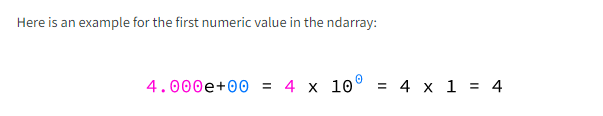

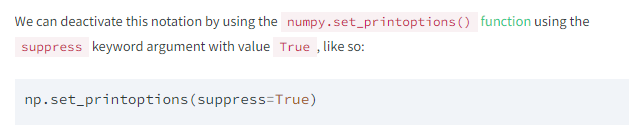

# array assignment 



In [9]:
#  practice without making changes to our original array

taxi_modified = taxi.copy()
taxi_modified[28214,5] = 1 # The value at column index 5 (pickup_location) of row index 28214 is incorrect(assumption), so we assign 1

In [10]:
taxi_modified[:,0] = 16 # The first column (index 0) contains year values as four digit numbers. Use assignment to change these values to the YY format (16) 

In [11]:
taxi_modified[1800:1802,7] = taxi_modified[:,7].mean() # assignment to change values in the taxi_modified ndarray to the mean value for that column.

Boolean arrays become very powerful when we use them for assignment

In [12]:
taxi_copy = taxi.copy()
total_amount = taxi_copy[:,13]
taxi_copy[total_amount < 0] = 0 # For rows where the value of total_amount is less than 0, use assignment to change the value to 0

# assignment using a boolean array with two dimensions

In [13]:
taxi_modified = taxi.copy()
zeros = np.zeros((taxi_modified.shape[0],1))
taxi_modified = np.concatenate((taxi_modified, zeros), axis = 1)
taxi_modified[:,15]

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
np.zeros([3,4]) # if we put () or [] it works the same in numpy

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [15]:
# pickup_location_code

pick_up = taxi_modified[:,5] 

In [16]:
taxi_modified[(pick_up == 2) |(pick_up == 3)|(pick_up == 5),15] = 1
# Alternate Method
# taxi_modified[(pick_up == 2),15] = 1
# taxi_modified[taxi_modified[:,5] == 3,15] = 1
# taxi_modified[pick_up == 5,15] = 1



# We want to figure out which airport is the most popular destination in our dataset

In [53]:
jfk = taxi[taxi[:,6]== 2]
jfk_count = jfk.shape[0]
jfk_count

11832

In [55]:
laguardia = taxi[taxi[:,6]== 3]
laguardia_count = laguardia.shape[0]
laguardia_count

16602

In [56]:
newark = taxi[taxi[:,6]== 5]
newark_count = newark.shape[0]
newark_count

63

Our calculations show that **Laguardia** is the most common airport for dropoffs in our data set.

# Removing potentially bad data from our data set, and then calculating some descriptive statistics on the remaining "clean" data.

In [57]:
# Using boolean indexing to remove any rows that have an average speed for the trip greater than 100 mph (160 kph)

In [60]:
trip_mph = taxi[:,7]/(taxi[:,8]/3600)
trip_mph

array([37.11340206, 38.58157895, 31.27222982, ..., 22.29907867,
       42.41551247, 36.90473407])

In [66]:
cleaned_taxi = taxi[trip_mph < 100]


In [69]:
mean_distance = cleaned_taxi[:,7].mean()
mean_length = cleaned_taxi[:,8].mean()
mean_total_amount = cleaned_taxi[:,13].mean()

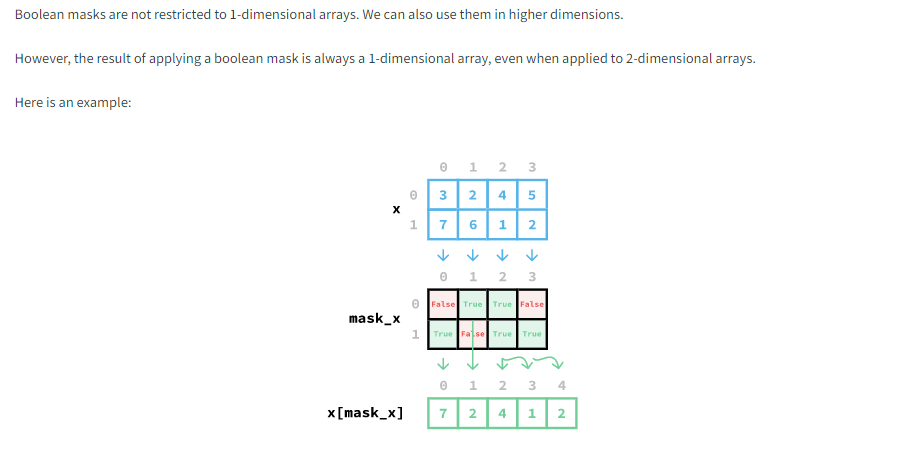

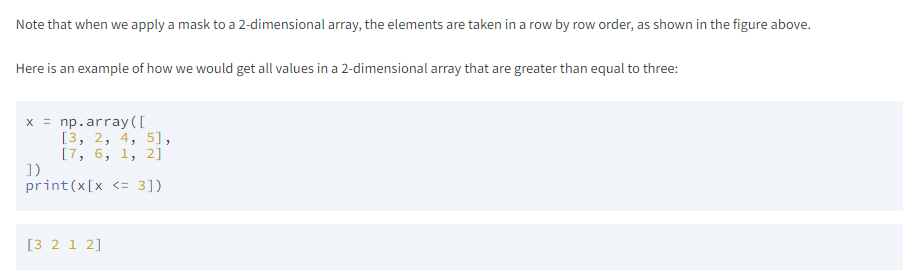

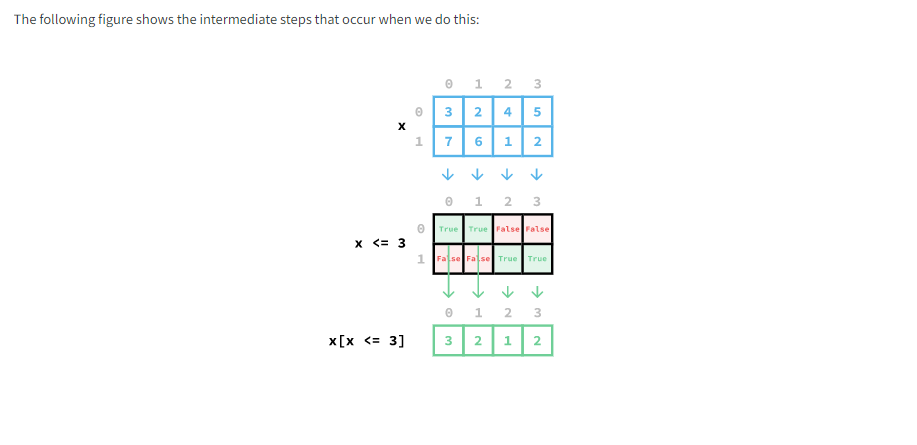

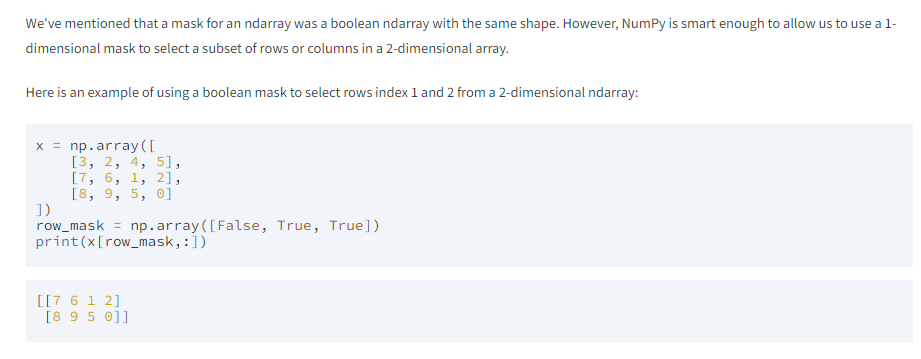

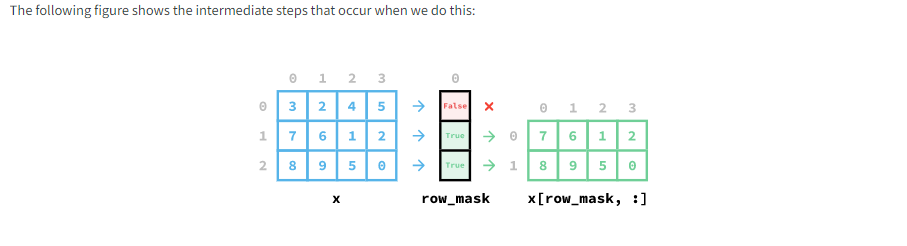

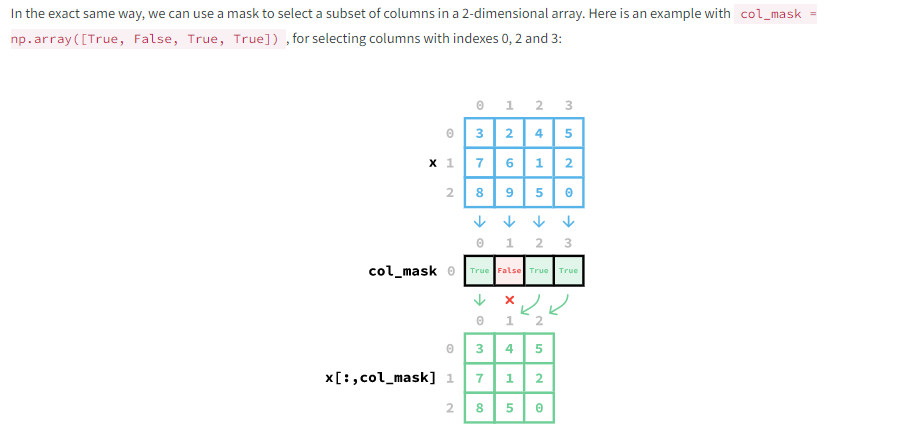

### NumPy Datatypes

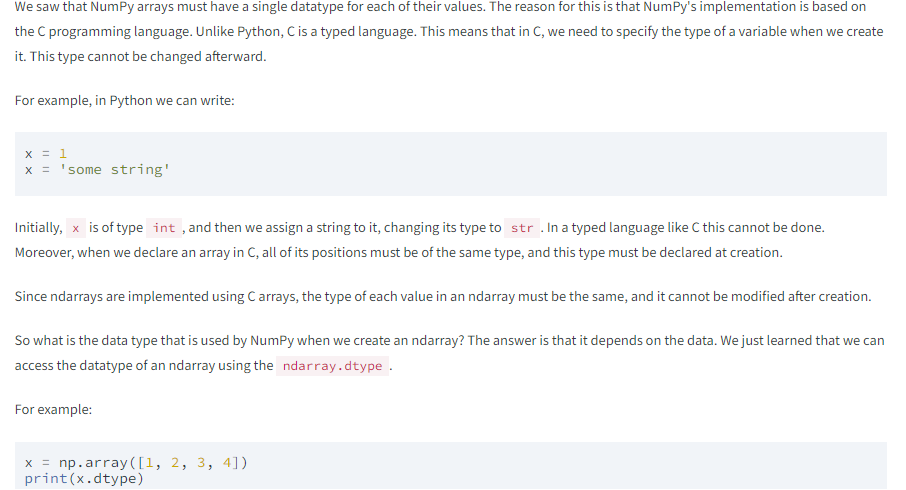

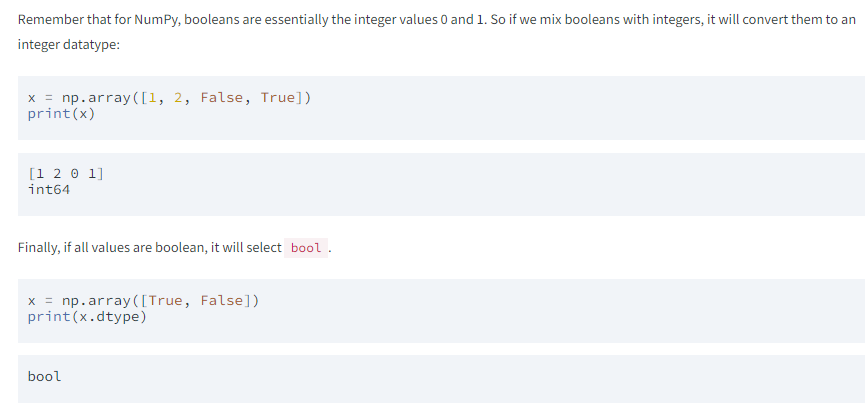

The `64` that we see in `int64` and `float64` tells us how many bits are used. The more bits we use to represent a number, the more memory they will use. Therefore, if our values are small, we'll be better off using fewer bits to represent them.

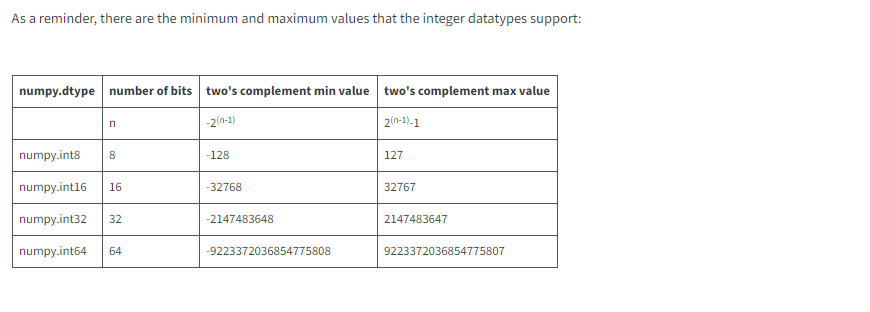

In [4]:
value_list = [-127, -57, -6, 0, 9, 42, 125]
value_array = np.array(value_list, dtype=np.int8)
value_array

array([-127,  -57,   -6,    0,    9,   42,  125], dtype=int8)

We used the type `numpy.int8` rather than the default `numpy.int64` because the values were within the range of 8-bit integers.

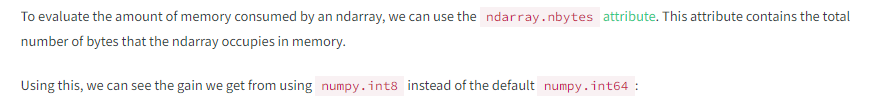

In [7]:
values = [-127, -57, -6, 0, 9, 42, 125]
x = np.array(values, dtype=np.int8)
y = np.array(values, dtype=np.int64)
print(x.nbytes)
print(y.nbytes)

7
56


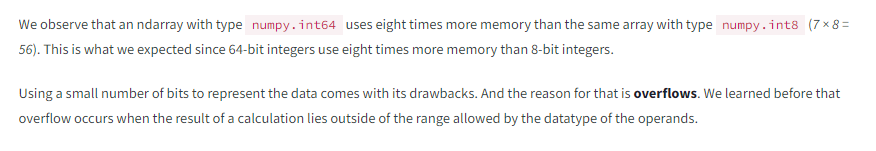

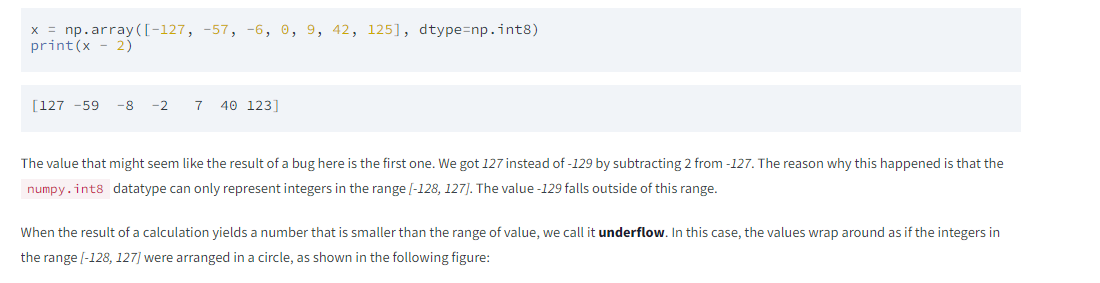

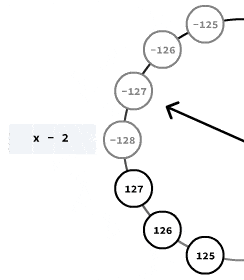

In [8]:
from IPython.display import Image

Image("7.1-m510-min.gif")

In this circle, subtracting one means moving counter-clockwise. So we move two times counter-clockwise: -127 → -128 → 127, as shown in the figure.

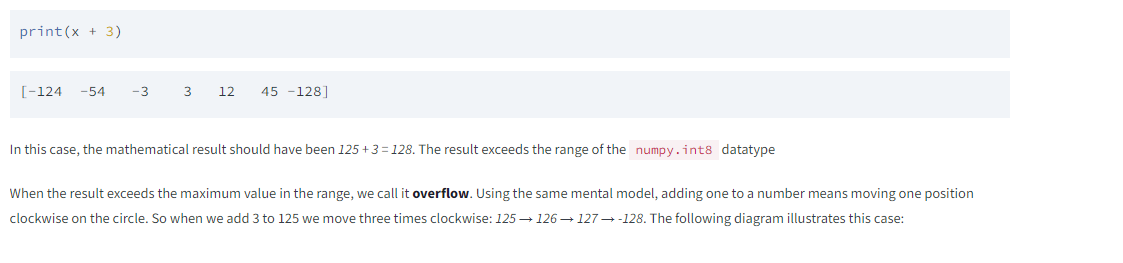

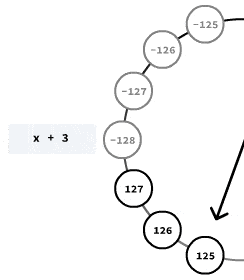

In [9]:
Image("7.2-m510-min.gif")

This means that we always need to consider both memory and overflows when selecting datatypes.

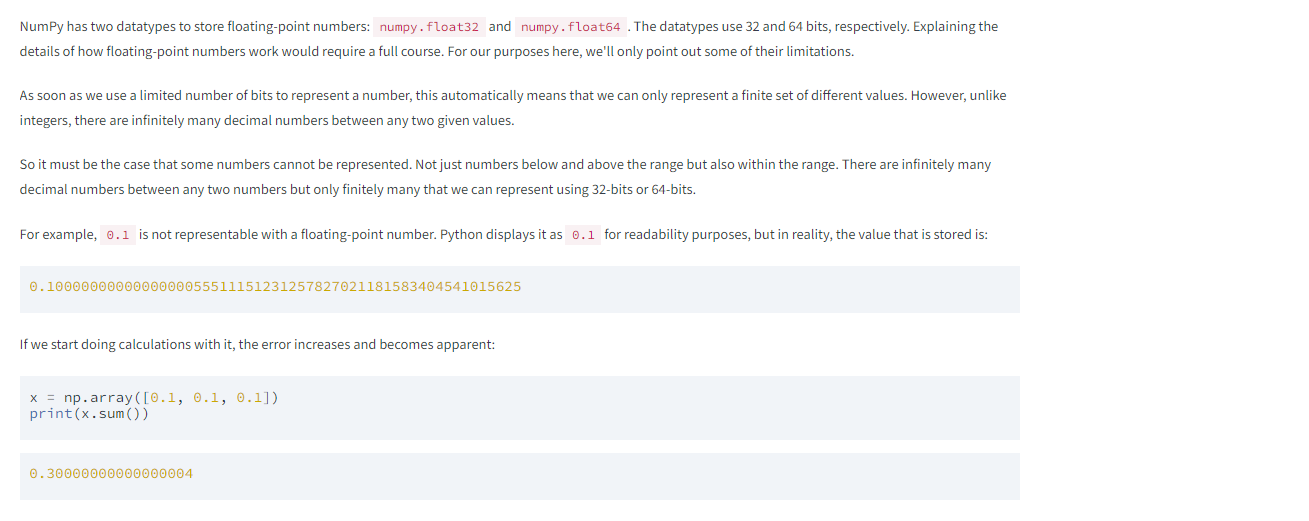

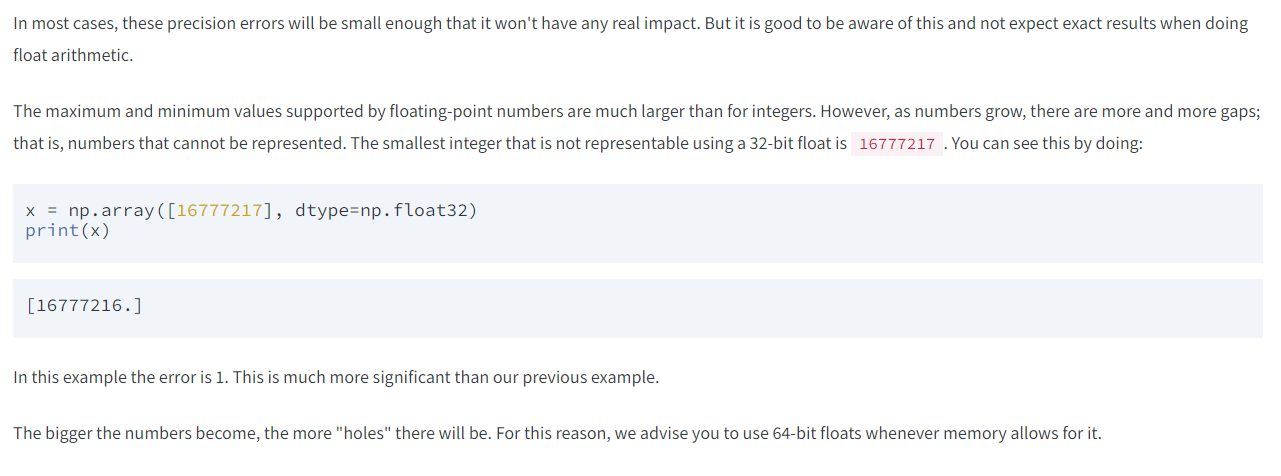

In a situation where memory isn't an issue, we should stick with using the default datatypes since these use bits. In this way, we'll be on the safe side regarding overflows. These are situations where either the machine we're working on has a lot of memory or the dataset we're using is small.

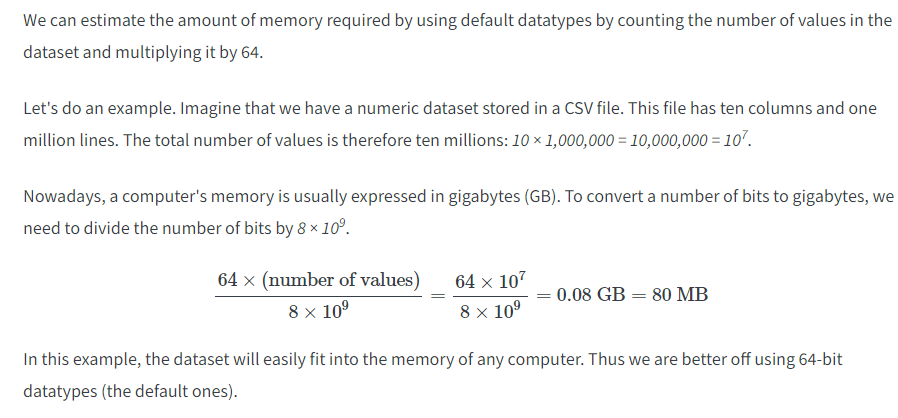

In [10]:
num_values = 8 * (10 ** 9)
num_bits = 64 * num_values
gb = num_bits / num_values

In [11]:
gb

64.0

If everything went well, in the previous exercise, we've obtained 64GB as a result. Only hi-end laptops have this much memory, and so in such a situation, we'll probably need to find good datatypes if we want to load the whole data into our laptop's memory.